In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from os import getcwd
from nltk.corpus import twitter_samples 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

import pdb
from nltk.corpus import stopwords, twitter_samples
import string
from nltk.tokenize import TweetTokenizer
from os import getcwd

In [2]:
df = pd.read_csv('/kaggle/input/marketing/marketing.csv')
#df = df.sample(frac=0.1, random_state=10)
print(df.shape)
df.head(20)

(8993, 14)


,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Income
0,2,1,5,4,5,5,3,3,0,1,1,7,?,9
1,1,1,5,5,5,5,3,5,2,1,1,7,1,9
2,2,1,3,5,1,5,2,3,1,2,3,7,1,9
3,2,5,1,2,6,5,1,4,2,3,1,7,1,1
4,2,5,1,2,6,3,1,4,2,3,1,7,1,1
5,1,1,6,4,8,5,3,2,0,1,1,7,1,8
6,1,5,2,3,9,4,1,3,1,2,3,7,1,1
7,1,3,3,4,3,5,1,1,0,2,3,7,1,6
8,1,1,6,3,8,5,3,3,0,2,3,7,1,2
9,1,1,7,4,8,4,3,2,0,2,3,7,1,4


In [3]:
missing_values = ['?']

# Read the CSV file with the specified missing values
df = pd.read_csv('/kaggle/input/marketing/marketing.csv', na_values=missing_values)

# Count the number of missing values in each column
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values per column:")
print(missing_values_count)

df.head(20)
#total missing values - 2.694

Missing values per column:
Sex                   0
MaritalStatus       160
Age                   0
Education            86
Occupation          136
YearsInSf           913
DualIncome            0
HouseholdMembers    375
Under18               0
HouseholdStatus     240
TypeOfHome          357
EthnicClass          68
Language            359
Income                0
dtype: int64


,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Income
0,2,1.0,5,4.0,5.0,5.0,3,3.0,0,1.0,1.0,7.0,NaN,9
1,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.0,9
2,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.0,9
3,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.0,1
4,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.0,1
5,1,1.0,6,4.0,8.0,5.0,3,2.0,0,1.0,1.0,7.0,1.0,8
6,1,5.0,2,3.0,9.0,4.0,1,3.0,1,2.0,3.0,7.0,1.0,1
7,1,3.0,3,4.0,3.0,5.0,1,1.0,0,2.0,3.0,7.0,1.0,6
8,1,1.0,6,3.0,8.0,5.0,3,3.0,0,2.0,3.0,7.0,1.0,2
9,1,1.0,7,4.0,8.0,4.0,3,2.0,0,2.0,3.0,7.0,1.0,4


In [7]:

ordinal_columns = [ 'Education', 'YearsInSf', 'HouseholdMembers']
df[ordinal_columns] = df[ordinal_columns].fillna(df[ordinal_columns].median())


nominal_columns = [ 'MaritalStatus', 'Occupation', 'HouseholdStatus', 'TypeOfHome', 'EthnicClass', 'Language']
for column in nominal_columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

print(df.isnull().sum())
df.head(20)

Sex                 0
MaritalStatus       0
Age                 0
Education           0
Occupation          0
YearsInSf           0
DualIncome          0
HouseholdMembers    0
Under18             0
HouseholdStatus     0
TypeOfHome          0
EthnicClass         0
Language            0
Income              0
dtype: int64


,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Income
0,2,1.0,5,4.0,5.0,5.0,3,3.0,0,1.0,1.0,7.0,1.0,9
1,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.0,9
2,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.0,9
3,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.0,1
4,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.0,1
5,1,1.0,6,4.0,8.0,5.0,3,2.0,0,1.0,1.0,7.0,1.0,8
6,1,5.0,2,3.0,9.0,4.0,1,3.0,1,2.0,3.0,7.0,1.0,1
7,1,3.0,3,4.0,3.0,5.0,1,1.0,0,2.0,3.0,7.0,1.0,6
8,1,1.0,6,3.0,8.0,5.0,3,3.0,0,2.0,3.0,7.0,1.0,2
9,1,1.0,7,4.0,8.0,4.0,3,2.0,0,2.0,3.0,7.0,1.0,4


In [8]:
df.to_csv('/kaggle/working/CleanData.csv', index=False)

**K-means**

In [9]:

from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import os

In [10]:
ordinal_df=df[['Age', 'Education', 'YearsInSf', 'HouseholdMembers', 'Under18','Income']]
ordinal_df.head(20)

,Age,Education,YearsInSf,HouseholdMembers,Under18,Income
0,5,4.0,5.0,3.0,0,9
1,5,5.0,5.0,5.0,2,9
2,3,5.0,5.0,3.0,1,9
3,1,2.0,5.0,4.0,2,1
4,1,2.0,3.0,4.0,2,1
5,6,4.0,5.0,2.0,0,8
6,2,3.0,4.0,3.0,1,1
7,3,4.0,5.0,1.0,0,6
8,6,3.0,5.0,3.0,0,2
9,7,4.0,4.0,2.0,0,4


In [11]:
data = ordinal_df.iloc[:, 0:-1]

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_ordinal = scaler.fit_transform(data)
normalized_ordinal = pd.DataFrame(normalized_ordinal, columns=data.columns)
normalized_ordinal.head(5)

,Age,Education,YearsInSf,HouseholdMembers,Under18
0,0.967815,0.132109,0.606741,0.094430,-0.615276
1,0.967815,0.940863,0.606741,1.424434,1.230039
2,-0.253566,0.940863,0.606741,0.094430,0.307381
3,-1.474947,-1.485397,0.606741,0.759432,1.230039
4,-1.474947,-1.485397,-1.077860,0.759432,1.230039


In [13]:
normalized_ordinal.to_csv('/kaggle/working/normalized_ordinal.csv', index=False)

In [9]:
#elbow method
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(normalized_ordinal)
    sse.append(kmeans.inertia_)

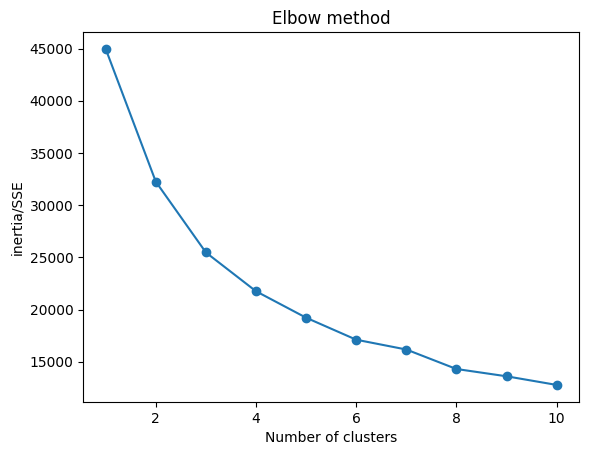

In [10]:
plt.plot(range(1,11), sse, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia/SSE')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(normalized_ordinal)

print('SSE:',kmeans.inertia_)
print('Final locations of the centroid:',kmeans.cluster_centers_)
print("The number of iterations required to converge", kmeans.n_iter_)


SSE: 26906.696232021008
Final locations of the centroid: [[-0.39144811  0.2642035  -0.52284539 -0.43515822 -0.46802494]
 [ 1.16662379  0.34861648  0.52491597 -0.42262969 -0.42061806]
 [-0.65893617 -0.75723389  0.21318293  1.08684588  1.13303114]]
The number of iterations required to converge 11


In [12]:
normalized_ordinal['cluster'] = kmeans.labels_.tolist()

           Age  Education  YearsInSf  HouseholdMembers   Under18  Clusters
0     0.967815   0.132109   0.606741          0.094430 -0.615276         1
1     0.967815   0.940863   0.606741          1.424434  1.230039         2
2    -0.253566   0.940863   0.606741          0.094430  0.307381         0
3    -1.474947  -1.485397   0.606741          0.759432  1.230039         2
4    -1.474947  -1.485397  -1.077860          0.759432  1.230039         2
...        ...        ...        ...               ...       ...       ...
8988 -1.474947  -2.294151   0.606741          0.094430  1.230039         2
8989 -0.864257   0.132109   0.606741          0.759432 -0.615276         0
8990 -1.474947  -1.485397   0.606741          0.094430  1.230039         2
8991  1.578506   0.132109   0.606741          0.094430  0.307381         1
8992 -0.253566   0.132109   0.606741         -1.235575 -0.615276         0

[8993 rows x 6 columns]


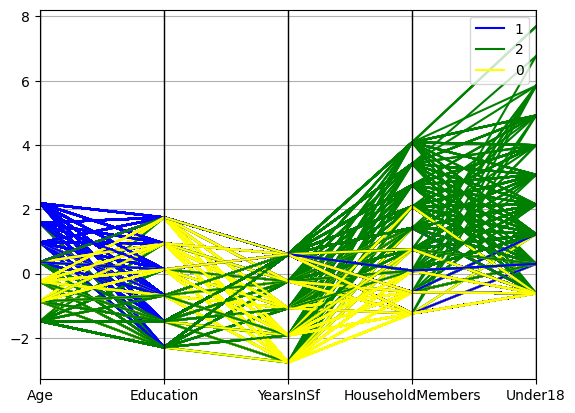

In [13]:
df2 = pd.DataFrame(normalized_ordinal ,columns = ['Age','Education','YearsInSf','HouseholdMembers','Under18'])
df2['Clusters']=kmeans.labels_
print(df2)
parallel_coordinates(df2, 'Clusters',color=('blue','green','yellow'))
plt.show()

**Agglomerative**

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data.head()
scaler = StandardScaler()
normalized_ordinal = scaler.fit_transform(data)
normalized_ordinal = pd.DataFrame(normalized_ordinal, columns=data.columns)
normalized_ordinal.head(5)

,Age,Education,YearsInSf,HouseholdMembers,Under18
0,0.967815,0.132109,0.606741,0.094430,-0.615276
1,0.967815,0.940863,0.606741,1.424434,1.230039
2,-0.253566,0.940863,0.606741,0.094430,0.307381
3,-1.474947,-1.485397,0.606741,0.759432,1.230039
4,-1.474947,-1.485397,-1.077860,0.759432,1.230039


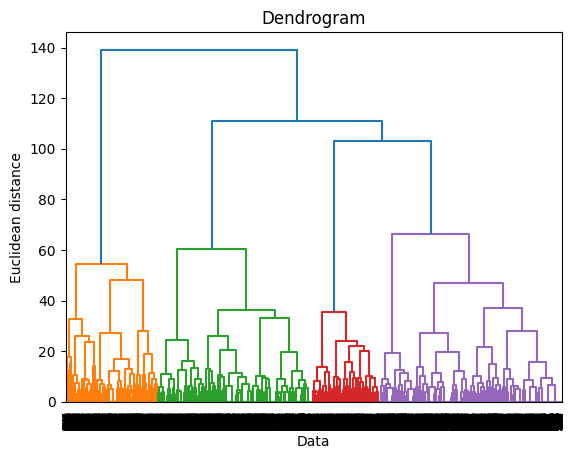

In [16]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(normalized_ordinal, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean distance')
plt.show()

In [17]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(normalized_ordinal)
normalized_ordinal['cluster'] = hierarchical_cluster.labels_.tolist()
print(normalized_ordinal)

           Age  Education  YearsInSf  HouseholdMembers   Under18  cluster
0     0.967815   0.132109   0.606741          0.094430 -0.615276        2
1     0.967815   0.940863   0.606741          1.424434  1.230039        1
2    -0.253566   0.940863   0.606741          0.094430  0.307381        2
3    -1.474947  -1.485397   0.606741          0.759432  1.230039        0
4    -1.474947  -1.485397  -1.077860          0.759432  1.230039        1
...        ...        ...        ...               ...       ...      ...
8988 -1.474947  -2.294151   0.606741          0.094430  1.230039        0
8989 -0.864257   0.132109   0.606741          0.759432 -0.615276        0
8990 -1.474947  -1.485397   0.606741          0.094430  1.230039        0
8991  1.578506   0.132109   0.606741          0.094430  0.307381        2
8992 -0.253566   0.132109   0.606741         -1.235575 -0.615276        0

[8993 rows x 6 columns]


**DBSCAN**

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.neighbors import NearestNeighbors

In [19]:
scaler = StandardScaler()
normalized_ordinal = scaler.fit_transform(data)
normalized_ordinal = pd.DataFrame(normalized_ordinal, columns=data.columns)
normalized_ordinal.head(5)

,Age,Education,YearsInSf,HouseholdMembers,Under18
0,0.967815,0.132109,0.606741,0.094430,-0.615276
1,0.967815,0.940863,0.606741,1.424434,1.230039
2,-0.253566,0.940863,0.606741,0.094430,0.307381
3,-1.474947,-1.485397,0.606741,0.759432,1.230039
4,-1.474947,-1.485397,-1.077860,0.759432,1.230039


In [20]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=4) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(normalized_ordinal) # fitting the data to the object
distances,indices=nbrs.kneighbors(normalized_ordinal) # finding the nearest neighbours

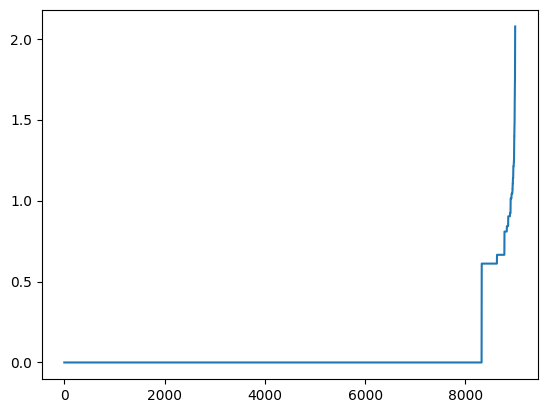

In [21]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.plot(distances) # plotting the distances
plt.show()

In [22]:
dbscan = DBSCAN(eps = 1, min_samples =4)
dbscan.fit(normalized_ordinal)

DBSCAN(eps=1, min_samples=4)

In [23]:
normalized_ordinal['cluster'] = dbscan.labels_.tolist()

           Age  Education  YearsInSf  HouseholdMembers   Under18  Clusters
0     0.967815   0.132109   0.606741          0.094430 -0.615276         0
1     0.967815   0.940863   0.606741          1.424434  1.230039         0
2    -0.253566   0.940863   0.606741          0.094430  0.307381         0
3    -1.474947  -1.485397   0.606741          0.759432  1.230039         0
4    -1.474947  -1.485397  -1.077860          0.759432  1.230039         0
...        ...        ...        ...               ...       ...       ...
8988 -1.474947  -2.294151   0.606741          0.094430  1.230039         0
8989 -0.864257   0.132109   0.606741          0.759432 -0.615276         0
8990 -1.474947  -1.485397   0.606741          0.094430  1.230039         0
8991  1.578506   0.132109   0.606741          0.094430  0.307381         0
8992 -0.253566   0.132109   0.606741         -1.235575 -0.615276         0

[8993 rows x 6 columns]


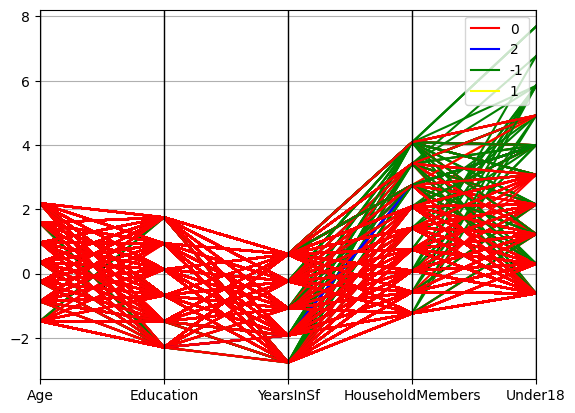

In [24]:
df2 = pd.DataFrame(normalized_ordinal ,columns = ['Age', 'Education', 'YearsInSf', 'HouseholdMembers', 'Under18'])
df2['Clusters']=dbscan.labels_
print(df2)
parallel_coordinates(df2, 'Clusters',color=('red','blue','green', "yellow", "black"))
plt.show()

**NB**

In [25]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

In [26]:
X = df.drop('Income', axis=1) 
y = df['Income']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

In [29]:
# Metrics for Multinomial Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print(f'Multinomial Naive Bayes Accuracy: {nb_accuracy}, Precision: {nb_precision}, Recall: {nb_recall}')


Multinomial Naive Bayes Accuracy: 0.32017787659811003, Precision: 0.2596176474653733, Recall: 0.32017787659811003


**KNN**

In [31]:
ordinal_df.head()

,Age,Education,YearsInSf,HouseholdMembers,Under18,Income
0,5,4.0,5.0,3.0,0,9
1,5,5.0,5.0,5.0,2,9
2,3,5.0,5.0,3.0,1,9
3,1,2.0,5.0,4.0,2,1
4,1,2.0,3.0,4.0,2,1


In [32]:
X_knn = ordinal_df.drop('Income', axis=1) 
y_knn = ordinal_df['Income']

In [33]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)



In [34]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_knn, y_train_knn)
knn_predictions = knn_model.predict(X_test_knn)

In [35]:
knn_accuracy = accuracy_score(y_test_knn, knn_predictions)
knn_precision = precision_score(y_test_knn, knn_predictions, average='weighted')
knn_recall = recall_score(y_test_knn, knn_predictions, average='weighted')

In [36]:
print(f'k-Nearest Neighbors Accuracy: {knn_accuracy}, Precision: {knn_precision}, Recall: {knn_recall}')


k-Nearest Neighbors Accuracy: 0.2668148971650917, Precision: 0.2596780097950932, Recall: 0.2668148971650917


**DecisionTree**

In [37]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [38]:

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')


In [39]:
print(f'Decision Tree Accuracy: {dt_accuracy}, Precision: {dt_precision}, Recall: {dt_recall}')


Decision Tree Accuracy: 0.292384658143413, Precision: 0.2912530191463548, Recall: 0.292384658143413


**RandomForestClassifier**

In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [41]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')


In [42]:
print(f'Multinomial Naive Bayes Accuracy: {nb_accuracy}, Precision: {nb_precision}, Recall: {nb_recall}')
print(f'k-Nearest Neighbors Accuracy: {knn_accuracy}, Precision: {knn_precision}, Recall: {knn_recall}')
print(f'Decision Tree Accuracy: {dt_accuracy}, Precision: {dt_precision}, Recall: {dt_recall}')
print(f'Random Forest Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}')


Multinomial Naive Bayes Accuracy: 0.32017787659811003, Precision: 0.2596176474653733, Recall: 0.32017787659811003
k-Nearest Neighbors Accuracy: 0.2668148971650917, Precision: 0.2596780097950932, Recall: 0.2668148971650917
Decision Tree Accuracy: 0.292384658143413, Precision: 0.2912530191463548, Recall: 0.292384658143413
Random Forest Accuracy: 0.3329627570872707, Precision: 0.31575793977401934, Recall: 0.3329627570872707


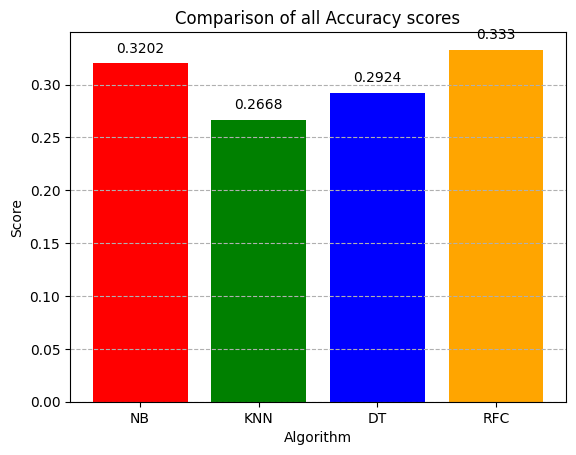

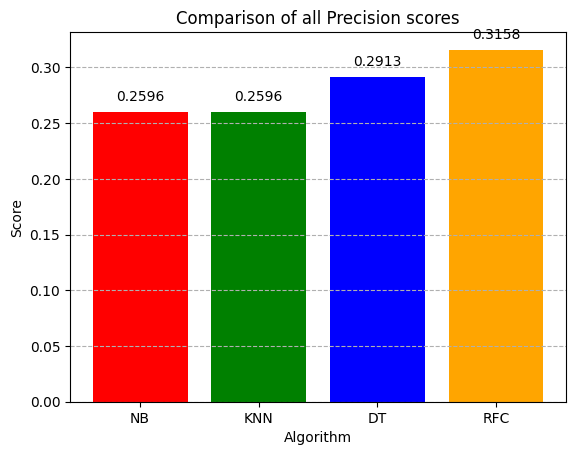

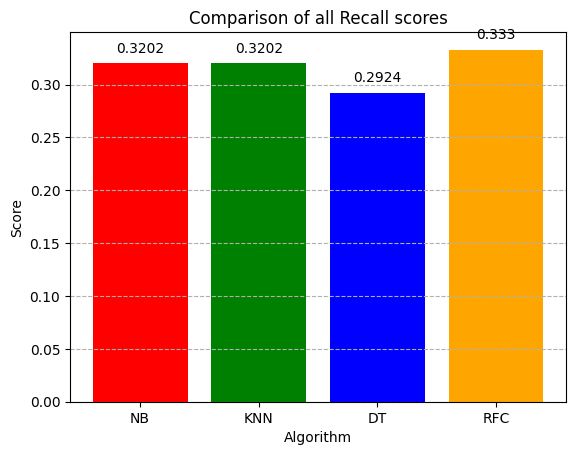

In [43]:
nb_accuracy=round(nb_accuracy ,4)
nb_precision=round(nb_precision,4)
nb_recall=round(nb_recall,4)
knn_accuracy=round(knn_accuracy,4)
dt_accuracy=round(dt_accuracy,4)
rf_accuracy=round(rf_accuracy,4)
knn_precision=round(nb_precision,4)
dt_precision=round(dt_precision,4)
rf_precision=round(rf_precision,4)
knn_recall=round(nb_recall,4)
dt_recall=round(dt_recall,4)
rf_recall=round(rf_recall,4)




# Accuracy 
variables=['NB','KNN','DT','RFC']
values=[nb_accuracy,knn_accuracy,dt_accuracy,rf_accuracy]
colors = ['red', 'green', 'blue', 'orange']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all Accuracy scores')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.show()

#Precision

variables=['NB','KNN','DT','RFC']
values=[nb_precision,knn_precision,dt_precision,rf_precision]
colors = ['red', 'green', 'blue', 'orange']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all Precision scores')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.show()

#Recall

variables=['NB','KNN','DT','RFC']
values=[nb_recall,knn_recall,dt_recall,rf_recall]
colors = ['red', 'green', 'blue', 'orange']
plt.bar(variables, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
    
plt.grid(axis='y',linestyle='--')
plt.title('Comparison of all Recall scores')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.show()